1. [Manual Vehicle Detection](#Manual Vehicle Detection)
2. [Feature](#Feature)
    1. [Teplate Matching](#Teplate Matching)
    2. [Histograms of Colour](#Histograms of Colour)
    3. [Histogram Comparison](#Histogram Comparison)

# 1. Manual Vehicle Detection<a name='Manual Vehicle Detection'></a>

<img src='Figures/1. bbox-example-image.jpg' width=500>

Here's our chance to be a human vehicle detector! In this lesson, we will be drawing a lot of bounding boxes on vehicle positions in images. Eventually, we'll have an algorithm that's spewing out bounding box positions and we'll want an easy way to plot them up over our images. So, now is a good time to get familiar with the __cv2.rectangle()__ function ([documentation](http://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html)) that makes it easy to draw boxes of different size, shape and color.

In this exercise, our goal is to write a function that takes as its arguments, an image, and a list of bounding box coordinates for each car. Our function should then draw bounding boxes on a copy of the image and return that as its output as the image below.

<img src='Figures/1. manual-bbox-quiz-output.jpg' width=500>

```Python
# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
```

We'll draw bounding boxes with __cv2.rectangle()__ like this:
```Python
cv2.rectangle(image_to_draw_on, (x1, y1), (x2, y2), color, thick)
```

In this call to __cv2.rectangle()__ our __image\_to\_draw\_on__ should be the copy of our image, then __(x1, y1)__ and __(x2, y2)__ are the $x$ and $y$ coordinates of any two opposing corners of the bounding box we want to draw. __color__ is a 3-tuple, for example, __(0, 0, 255)__ for blue, and __thick__ is an optional integer parameter to define the box thickness.

Have a look at the image above with labeled axes, where some bounding boxes and "guesstimate" where some of the box corners are were drawn. We should pass our bounding box positions to our __draw_boxes()__ function as a list of tuple pairs, like this:
```Python
bboxes = [((x1, y1), (x2, y2)), ((,),(,)), ...]
```

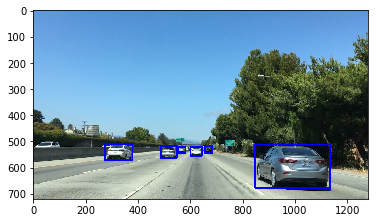

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
image = mpimg.imread('Figures/1. bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img # Change this line to return image copy with boxes
# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

# 2. Feature <a name='Feature'></a>

__QUIZ: Feature Intuition__

Features describe the characteristics of an object, and with images, it really all comes down to intensity and gradients of intensity, and how these features capture the color and shape of an object.

<img src='Figures/2. Feature Intuition.png' width=500>

### 2.1. Teplate Matching <a name='Teplate Matching'></a>

<img src='Figures/3. bbox-example-image.jpg' width=500>

To figure out when template matching works and when it doesn't, let's play around with the OpenCV __cv2.matchTemplate()__ function! In the bounding boxes exercise, we found six cars in the image above. This time, we're going to play the opposite game. Assuming we know these six cars are what we're looking for, we can use them as templates and search the image for matches.

__Let's suppose we want to find the templates shown below in the image shown above:__

<img src='Figures/3. cutout1.jpg' width=150>
<img src='Figures/3. cutout2.jpg' width=150>
<img src='Figures/3. cutout3.jpg' width=150>
<img src='Figures/3. cutout4.jpg' width=150>
<img src='Figures/3. cutout5.jpg' width=150>
<img src='Figures/3. cutout6.jpg' width=150>

Our goal in this exercise is to write a function that takes in an image and a list of templates, and returns a list of the best fit location (bounding box) for each of the templates within the image. OpenCV provides us with the handy function __cv2.matchTemplate()__ ([documentation](http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html)) to search the image, and __cv2.minMaxLoc()__ ([documentation](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?highlight=minmaxloc#cv2.minMaxLoc)) to extract the location of the best match.

We can choose between "squared difference" or "correlation" methods in using __cv2.matchTemplate()__, but keep in mind with squared differences we need to locate the global minimum difference to find a match, while for correlation, we're looking for a global maximum.

Follow along with [this tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) provided by OpenCV to try some different template matching techniques. The function we write should work like this:

```Python
def find_matches(img, template_list):
    # Iterate over the list of templates
    # Use cv2.matchTemplate() to search the image for each template
    # NOTE: You can use any of the cv2.matchTemplate() search methods
    # Use cv2.minMaxLoc() to extract the location of the best match in each case
    # Compile a list of bounding box corners as output
    # Return the list of bounding boxes
```

__However__, the point of this exercise is not to discover why template matching works for vehicle detection, but rather, why it doesn't! So, after we have a working implementation of the __find\_matches()__ function, try it on the second image, __temp-matching-example-2.jpg__, which is currently commented out.

In the second image, all of the same six cars are visible (just a few seconds later in the video), but we'll find that none of the templates find the correct match! This is because with template matching we can only find very close matches, and changes in size or orientation of a car make it impossible to match with a template.

So, just to be clear, our goal here is to:

- Write a function that takes in an image and list of templates and returns a list of bounding boxes.
- Find that our function works well to locate the six example templates taken from the first image.
- Try our code on the second image, and find that template matching breaks easily.

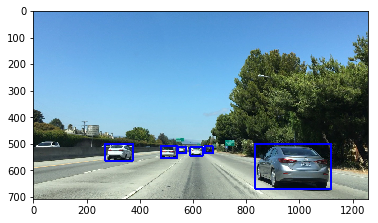

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('Figures/3. bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['Figures/3. cutout1.jpg', 'Figures/3. cutout2.jpg', 'Figures/3. cutout3.jpg',
            'Figures/3. cutout4.jpg', 'Figures/3. cutout5.jpg', 'Figures/3. cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    # Define an empty list to take bbox coords
    bbox_list = []
    # Iterate through template list
    # Read in templates one by one
    # Use cv2.matchTemplate() to search the image
    #     using whichever of the OpenCV search methods you prefer
    # Use cv2.minMaxLoc() to extract the location of the best match
    # Determine bounding box corners for the match
    # Return the list of bounding boxes
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)

__Answer:__
```Python
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list
```

---
So the exercise in finding cars has so far been mostly for the purpose of getting you familiarized with searching for objects in an image and drawing bounding boxes where we find them. But before we move on, one more quiz for intuition on the method of template matching!

__ Quiz: Template Matching__

<img src='Figures/4. 10-q-quiz-slide-v2.png' width=500>

Assume our template is the car image on the left marked "template". If the other cars (A-D) were located somewhere in an image, which ones would we find to be a match using template matching?

1. A
2. B
3. C
4. D

__Answer: B__

Only the image where the car is very close to the same orientation, size, and color will be a match to this template.

### 2.2. Histograms of Colour <a name='Histograms of Colour'></a>

We've looked at using raw pixel intensities as features and now we'll look at histograms of pixel intensity (color histograms) as features.

We'll use the template shown below from the last exercise as an example. 

We can construct histograms of the R, G, and B channels like this:
```Python
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
```

With __np.histogram()__, we don't actually have to specify the number of bins or the range, but here we've arbitrarily chosen __32 bins__ and specified __range=(0, 256)__ in order to get orderly bin sizes. __np.histogram()__ returns a tuple of two arrays. In this case, for example, __rhist[0]__ contains the counts in each of the bins and __rhist[1]__ contains the bin edges (so it is one element longer than __rhist[0]__).

To look at a plot of these results, we can compute the bin centers from the bin edges. Each of the histograms in this case have the same bins, so we'll just use the __rhist__ bin edges:
```Python
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
```

And then plotting up the results in a bar chart:
```Python
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
```

Which gives us this result:
<img src='Figures/4. rgb-histogram-plot.jpg' width=500>

These, collectively, are now our feature vector for this particular cutout image. We can concatenate them in the following way:
```Python
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
```

__Quiz:__
Having a function that does all these steps might be useful for the project so for this next exercise, our goal is to write a function that takes an image and computes the RGB color histogram of features given a particular number of bins and pixels intensity range, and returns the concatenated RGB feature vector, like this:
```Python
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    # Concatenate the histograms into a single feature vector
    # Return the feature vector
```

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('Figures/3. cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = None
    ghist = None
    bhist = None
    # Generating bin centers
    bin_centers = None
    # Concatenate the histograms into a single feature vector
    hist_features = None
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Function is returning None for at least one variable...')

Your function is returning None for at least one variable...


__Answer:__
```Python
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
```

### 2.3. Histogram Comparison <a name='Histogram Comparison'></a>

Let's look at the color histogram features for two totally different images. The first image is of a red car and the second a blue car. The red car's color histograms are displayed on the first row and the blue car's are displayed on the second row below. Here we are just looking at 8 bins per RGB channel.

If we had to, we could differentiate the two images based on the differences in histograms alone. As expected the image of the red car has a greater intensity of total bin values in the __R Histogram 1__ (Red Channel) compared to the blue car's __R Histogram 2__. In contrast the blue car has a greater intensity of total bin values in __B Histogram 2__ (Blue Channel) than the red car's __B Histogram 1__ features.

<img src='Figures/4. hist-compare.jpg' width=500>

Differentiating images by the intensity and range of color they contain can be helpful for looking at car vs non-car images.

### 2.4. Explore Colour Sapces <a name='Explore Colour Sapces'></a>